In [1]:
# cp -r HistokatController /usr/local/anaconda3/lib/python3.6/site-packages/histokat/backend/lib
# cd /usr/local/anaconda3/lib/python3.6/site-packages/histokat/backend/lib
# install_name_tool -add_rpath "@loader_path/HistokatController/lib" libHistokatController.dylib

using PyCall
using PyPlot
@pyimport histokat

objc[5903]: Class RunLoopModeTracker is implemented in both /usr/local/anaconda3/lib/libQt5Core.5.dylib (0x1247f78b8) and /usr/local/anaconda3/lib/python3.6/site-packages/histokat/backend/lib/HistokatController/lib/QtCore.framework/Versions/5/QtCore (0x12899be38). One of the two will be used. Which one is undefined.


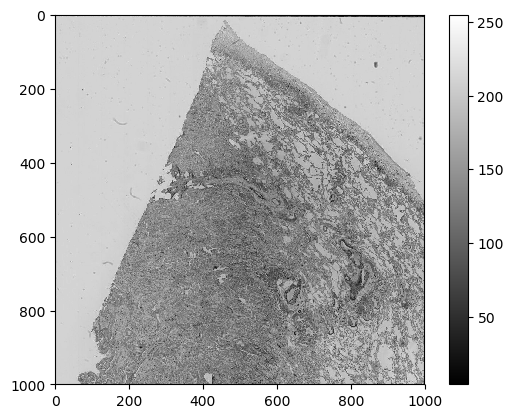

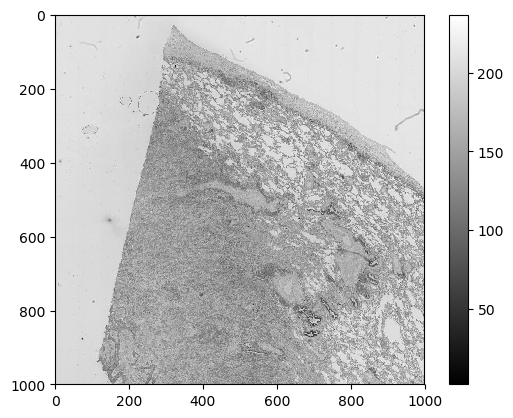

PyObject <matplotlib.colorbar.Colorbar object at 0x14aaa8550>

In [16]:
tile_size = [1000, 1000]

function get_tile(image, level, x, y, z)
    # get correct level and position
    max_level = image[:get_num_levels]() - 1
    level = max_level - level
    x = tile_size[1] * x
    y = tile_size[2] * y
    region = [[x, y, z], [x + tile_size[2] - 1, y + tile_size[2] - 1, z]]
    # load tile as numpy array
    tile = image[:open_region](level, region)
    # normalize and convert to uint8 image
    tile = tile .* (255.0/image[:get_value_range]()[:max])
    #tile = Image.fromarray(tile.astype(np.uint8))
    tile = sum(Array(tile)[1,:,:,:],3)[:,:,1]/3
    return tile
end


imageR = histokat.controller[:open_session]("/Users/jo/data/example-data-LL1_1_CD146-2014.tif")[:get_image]()
imageT = histokat.controller[:open_session]("/Users/jo/data/example-data-LL1_4_KL1-2014.tif")[:get_image]()

figure()
arr = get_tile(imageR, 10, 0,0,0)
imshow(arr, cmap="gray")
colorbar()
figure()
arr = get_tile(imageT, 10, 0,0,0)
imshow(arr, cmap="gray")
colorbar()

In [6]:
a = rand(10,10,3)
sum(a,3)

10×10×1 Array{Float64,3}:
[:, :, 1] =
 1.3886   1.60879   1.98245   1.38437   …  1.65234   1.45076   1.45878 
 1.81121  2.05299   1.61524   1.97189      1.76947   2.00388   2.56751 
 1.83234  2.6167    2.24513   1.74437      1.79163   1.83403   1.7909  
 1.26831  1.11646   0.729276  2.10802      1.30704   0.608446  1.77324 
 1.67342  1.61759   1.7672    1.63755      1.90226   1.11807   1.39599 
 1.78269  0.702731  2.64538   1.18433   …  1.4118    1.29937   1.85771 
 2.08311  2.02979   0.765718  2.14938      0.878283  2.41078   0.951293
 1.55955  2.51319   0.696972  1.46736      1.70849   1.44735   1.16631 
 1.57523  1.7638    1.29833   0.759659     1.34343   1.26794   2.019   
 1.3076   1.7124    1.78588   2.1459       0.174639  0.781784  1.22915 

In [4]:
ENV["PYTHON"]="/usr/local/anaconda3/bin/python"
Pkg.build("PyCall")

INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is using /usr/local/anaconda3/bin/python (Python 3.6.4) at /usr/local/anaconda3/bin/python, libpython = /usr/local/anaconda3/lib/libpython3.6m
INFO: /Users/jo/.julia/v0.6/PyCall/deps/deps.jl has been updated
INFO: /Users/jo/.julia/v0.6/PyCall/deps/PYTHON has been updated
